In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from Som import Som

def cargarCSV(csvRelativePath, delimeter = ',') -> np.ndarray[any]:
    this_folder = os.path.abspath('') 
    fullPath = os.path.join(this_folder, csvRelativePath)
    return np.loadtxt(fullPath, dtype=float, delimiter=delimeter)

data = cargarCSV('./data/te.csv')

som2d10 = Som(
    N=10,
    vecindades=[(5,5), (4,1), (0,0)],
    tasa_aprendizaje=[(0.9, 0.7), (0.7, 0.1), (0.1, 0.01)],
    epocas=[500, 1000, 3000]
)
som2d5 = Som(
    N=5,
    vecindades=[(3,3), (2,1), (0,0)],
    tasa_aprendizaje=[(0.9, 0.7), (0.7, 0.1), (0.1, 0.01)],
    epocas=[500, 1000, 3000]
)
som2d2 = Som(
    N=2,
    vecindades=[(3,3), (2,1), (0,0)],
    tasa_aprendizaje=[(0.9, 0.7), (0.7, 0.1), (0.1, 0.01)],
    epocas=[500, 1000, 3000]
)
w_etapas2d10 = som2d10.entrenar(data)
w_etapas2d5 = som2d5.entrenar(data)
w_etapas2d2 = som2d2.entrenar(data)

In [8]:
# Graficar
def graphEtapas(som: Som, w_etapas: list[np.ndarray[float]]):
    fig, ax = plt.subplots(1,len(w_etapas))
    fig.set_figwidth(15)
    fig.set_figheight(5)
    for i in range(len(w_etapas)):
        ax[i].grid()
        ax[i].scatter(data[:,0],data[:,1], marker='x', c='grey')
        ax[i].scatter(w_etapas[i][:,:,0], w_etapas[i][:,:,1], marker='o')
        for n in range(som.N):
            ax[i].plot(w_etapas[i][n,:,0], w_etapas[i][n,:,1], c='r')
            ax[i].plot(w_etapas[i][:,n,0], w_etapas[i][:,n,1], c='r')

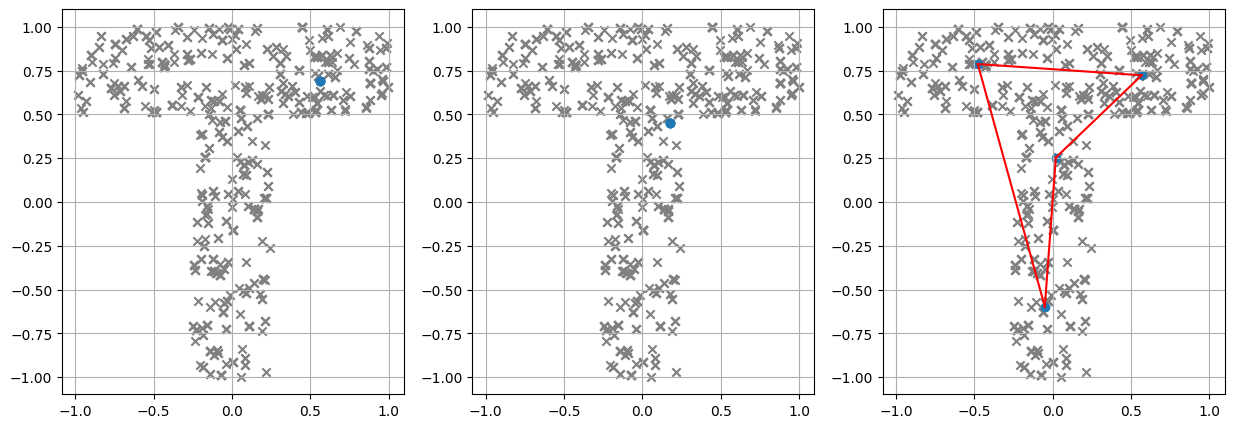

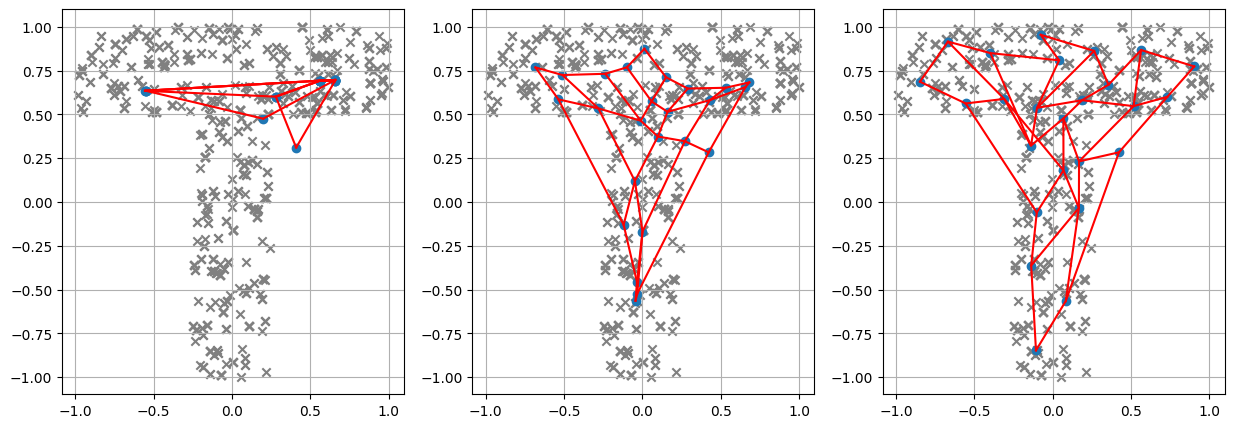

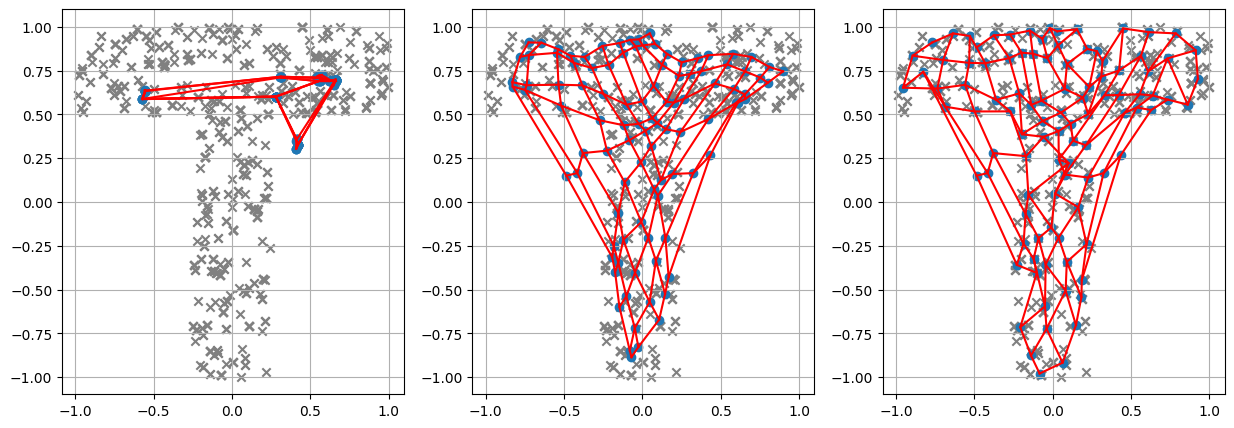

In [9]:
graphEtapas(som2d2, w_etapas2d2)
graphEtapas(som2d5, w_etapas2d5)
graphEtapas(som2d10, w_etapas2d10)